In [ ]:
#Importamos las librerias a utilizar

import pickle
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.utils import shuffle
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from random import randint

import cv2
from numpy import newaxis

import keras
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

%matplotlib inline

In [ ]:
#Importamos el dataset a usar
!git clone https://bitbucket.org/jadslim/german-traffic-signs
    

Cloning into 'german-traffic-signs'...
Unpacking objects: 100% (6/6), done.


In [ ]:
#Se definen las rutas

training_file = 'german-traffic-signs/train.p'
testing_file = 'german-traffic-signs/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)

with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Test Set:       12630 samples


In [ ]:
#Mostramos el tamaño del set de training y testing

n_train = X_train.shape[0]

n_test = X_test.shape[0]

image_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])

n_classes = y_train.max() + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [ ]:
#Realizamos la asociacion numero-nombre de la señal para cada imagen

sign_name = pd.read_csv('/content/german-traffic-signs/signnames.csv')

sign = {} #Definimos un diccionario para realizar la asociacion de numero:nombre
for k in range(len(sign_name)):
    sign[sign_name['ClassId'][k]] =  sign_name['SignName'][k]

sign #Visualizamos el resultado final

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vechiles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vechiles',
 16: 'Vechiles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

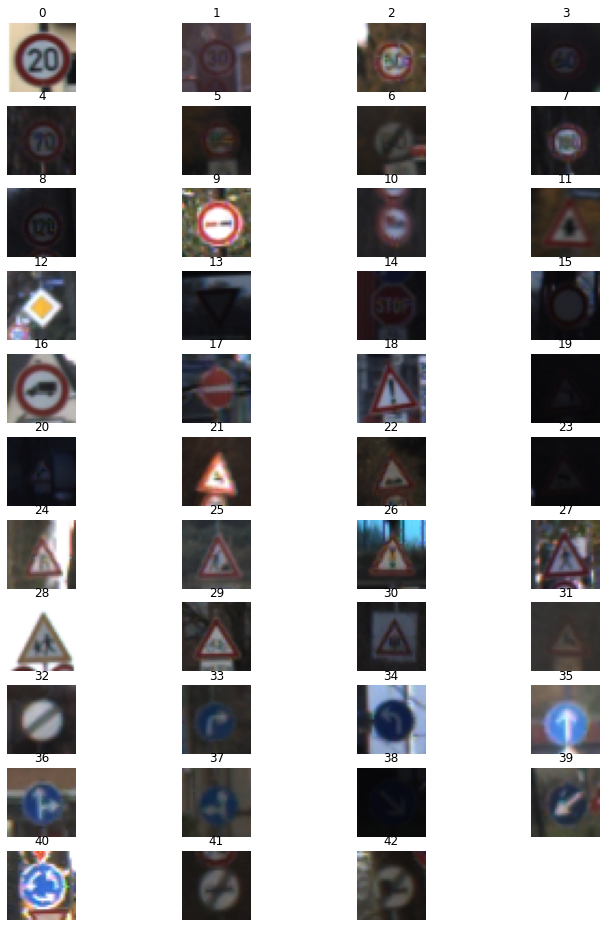

In [ ]:
#Revisamos un ejemplo de cada categoria

num_of_samples=[]
plt.figure(figsize=(12, 16.5))
for i in range(0,n_classes): 
    plt.subplot(11, 4, i+1)
    x_selected = X_train[y_train == i]
    plt.imshow(x_selected[0, :, :, :]) 
    plt.title(i)
    plt.axis('off')
    num_of_samples.append(len(x_selected))
plt.show()

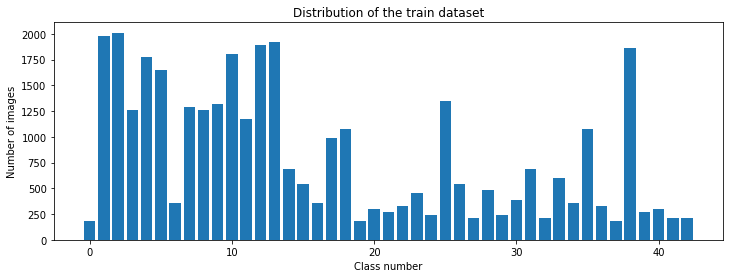

Min number of images per class = 180
Max number of images per class = 2010


In [ ]:
#A traves de un grafico veremos la distribucion de las imagenes por cada categoria
plt.figure(figsize=(12, 4))
plt.bar(range(0, n_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

print("Min number of images per class =", min(num_of_samples))
print("Max number of images per class =", max(num_of_samples))


In [ ]:
#Definimos las funciones que utilizaremos mas adelante

def gray_maker(data):
    gray_images = []
    for image in data:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_images.append(gray)
    return np.array(gray_images)


def preprocess(data,data_name,verbose):
    if verbose:
        print('Preprocessing '+ data_name + '...')


    data = gray_maker(data)
    data = data[..., newaxis]

    #Normalizamos los datos
    data = data / 255 * 0.8 + 0.1

    if verbose:
        print('Finished preprocessing '+ data_name + '...')

    #Revisamos el resultado
    image_shape = data.shape

    if verbose:
        print('Processed '+ data_name + ' shape =', image_shape)
        print(" ")
    return data

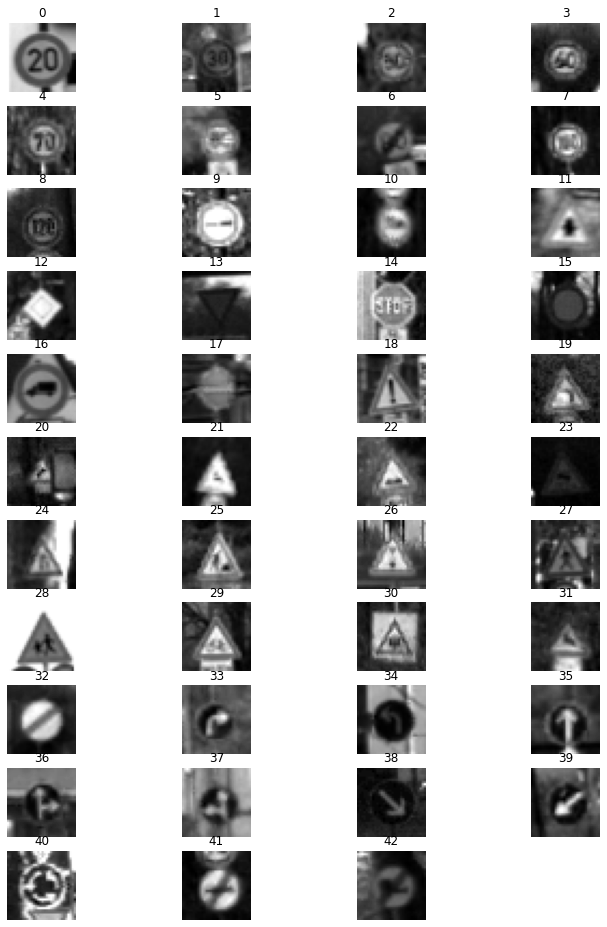

In [ ]:
#Vemos el resultado de las imagenes en escala de grises

num_of_samples=[]
plt.figure(figsize=(12, 16.5))
for i in range(0, n_classes):
    plt.subplot(11, 4, i+1)
    x_selected_grey = X_train[y_train == i]
    
    plt.imshow(x_selected_grey[0, :, :, 0], cmap = 'gray') 
    plt.title(i)
    plt.axis('off')
    num_of_samples.append(len(x_selected))
plt.show()

In [ ]:
#Revisamos el array

x_selected_grey[1, :, :, 0]

array([[ 93,  95, 106, ...,  80,  82,  68],
       [108, 118, 128, ...,  85,  85,  79],
       [137, 155, 137, ...,  89,  95, 107],
       ...,
       [ 64,  70,  68, ...,  25,  26,  39],
       [ 73,  63,  61, ...,  23,  23,  39],
       [ 68,  57,  53, ...,  21,  23,  31]], dtype=uint8)

In [ ]:
#Preprocesamiento de los datos

X_train = preprocess(X_train,'train_data',verbose = True)
X_test = preprocess(X_test,'test_data',verbose = True)

Preprocessing train_data...
Finished preprocessing train_data...
Processed train_data shape = (34799, 32, 32, 1)
 
Preprocessing test_data...
Finished preprocessing test_data...
Processed test_data shape = (12630, 32, 32, 1)
 


In [ ]:
#Reorganizamos los datos de entrenamiento

from sklearn.model_selection import train_test_split

X_train, y_train = shuffle(X_train, y_train)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,stratify = y_train,test_size=0.1,random_state=23)

n_train = X_train.shape[0]
n_valid = X_valid.shape[0]


print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)

Number of training examples = 31319
Number of validation examples = 3480


In [ ]:
#Categorizamos los datos

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print(y_train.shape)
print(y_test.shape)

(31319, 43)
(12630, 43)


In [ ]:
#Creando la red neuronal

model = keras.Sequential()

model.add(Conv2D(32, (3,3), input_shape=(32,32,1), activation='relu')) #Aca tenias definido un input_shape de (32,32,3) y todas tus shapes eran de (32,32,1) por eso arrojaba error
model.add(Conv2D(32, (3,3), input_shape=(32,32,1), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), input_shape=(32,32,1), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(43, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0

In [ ]:
#Entrenamos el modelo
model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist = model.fit(X_train,y_train,batch_size=120,epochs=25,validation_data=(X_test,y_test) 
)

Epoch 1/25
261/261 [==============================] - 87s 331ms/step - loss: 3.6005 - accuracy: 0.0559 - val_loss: 3.4696 - val_accuracy: 0.0698
Epoch 2/25
261/261 [==============================] - 86s 331ms/step - loss: 3.4620 - accuracy: 0.0705 - val_loss: 3.4443 - val_accuracy: 0.1105
Epoch 3/25
261/261 [==============================] - 86s 331ms/step - loss: 3.3998 - accuracy: 0.1062 - val_loss: 3.3614 - val_accuracy: 0.1521
Epoch 4/25
261/261 [==============================] - 86s 330ms/step - loss: 3.1117 - accuracy: 0.2065 - val_loss: 2.9881 - val_accuracy: 0.2310
Epoch 5/25
261/261 [==============================] - 87s 333ms/step - loss: 2.4818 - accuracy: 0.3497 - val_loss: 2.3815 - val_accuracy: 0.3625
Epoch 6/25
261/261 [==============================] - 86s 328ms/step - loss: 1.6686 - accuracy: 0.5560 - val_loss: 1.6485 - val_accuracy: 0.5740
Epoch 7/25
261/261 [==============================] - 86s 328ms/step - loss: 1.0634 - accuracy: 0.7119 - val_loss: 1.2483 - val_ac

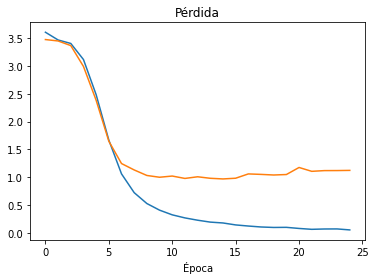

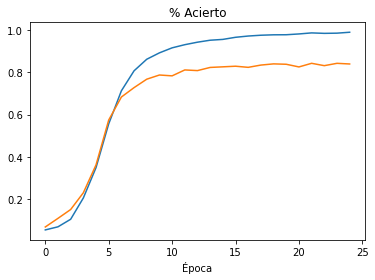

In [ ]:
#Analizamos la perdida y acierto del entrenamiento

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()


##Analisis de resultados

Podemos ver en los graficos que el modelo comienza "aplanarse" alrededor de las 10 epocas. Si hubiera que realizar cambios seria bajar las epocas y dejarlas en 10, maximo 15. Aun asi los resultaos son bastante bueno llegando al 98% con los datos de entrenamiento y 83% con los datos de prueba.
Veamos a continuacion una prueba del modelo.

In [ ]:
#Realizamos una prediccion y evaluamos para cada una de las categorias
predictions = model.predict((X_test) > 0.5)

predictions_f = predictions.astype("int32")

print(classification_report(y_test,predictions_f,zero_division = 0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.94      0.17      0.29       720
           2       0.93      0.30      0.45       750
           3       0.61      0.11      0.19       450
           4       0.95      0.05      0.10       660
           5       0.81      0.17      0.28       630
           6       1.00      0.09      0.16       150
           7       0.50      0.12      0.20       450
           8       0.85      0.02      0.05       450
           9       0.98      0.24      0.39       480
          10       0.51      0.14      0.21       660
          11       0.80      0.29      0.43       420
          12       0.96      0.34      0.51       690
          13       1.00      0.63      0.78       720
          14       0.88      0.16      0.27       270
          15       0.55      0.44      0.49       210
          16       0.86      0.25      0.39       150
          17       0.98    

#Resultados de la prediccion

Al definir el treshold en 0.5 se entiende que cuando la probabilidad de una prediccion es mayor al 50%, entonces la prediccion es correcta.

La mayoria de las categorias tienen resultados altos. El modelo parece funcionar de buena manera.